# Your name: David (Jung Won) Yang

# Your netID: jwy273

### Exercise 0

Study and play around with the notebooks:

* Python_fundamentals.ipynb
* Numpy_Basics.ipynb
* Pandas_Basics.ipynb

All the information needed to complete this assignment are contained in these notebooks or obtainable by a quick google search.

# Part 1: Python fundamentals (18 points)

### Exercise 1 (2 points)

Alice is sending a short email message to Bob. She wants to format the message on screen so she knows what she is sending. She is using the string called template below. Change the value of the template string to make it better.

In [107]:
# Edit this string
template ="From {0}, To {1},  {2}: {3}"

# This should result in a nice message
template.format("alice@domain.org", "bob@domain.org", "Alice's Subject", "This is my one line message!")

 

"From alice@domain.org, To bob@domain.org,  Alice's Subject: This is my one line message!"

### Exercise 2 (2 points)

Create a list of numbers where every item in the list is the same as its index, i.e. number_list[4] is 4. Create a list that contains 5 items, then create one that has a 1000.

In [108]:
# Edit the contents of this list
number_list1 = [0,1,2,3,4]
number_list2 = list(range(1000))

### Exercise 3 (8 points)

First we need some data, in this case we want to create two dictionaries, each with a name and email key:

In [109]:
# Edit with the values you want.
entry_1 = {'name': "David",
           'email': "jwy273@nyu.edu"}

# Add the keys and values to this entry like above.
entry_2 = {'name': 'David',
            'email' : 'davidjwyang@gmail.com'}

print(entry_1)
print(entry_2)

{'name': 'David', 'email': 'jwy273@nyu.edu'}
{'name': 'David', 'email': 'davidjwyang@gmail.com'}


Once you have two dictionaries, entry_1 and entry_2 with values for the keys 'name' and 'email', let's put them into a list.

In [110]:
entries = [entry_1,entry_2]  # Edit this list to include both entries

print(entries)

[{'name': 'David', 'email': 'jwy273@nyu.edu'}, {'name': 'David', 'email': 'davidjwyang@gmail.com'}]


Now you can write your own message which uses both the 'name' and 'email' values. You can write anything you want. We are going to use another way to write Python strings, inside triple quote string you can just press enter for a newline, no "\n" required. Just write as you would normally in an editor.

In [111]:
# Edit this message
message = """To: {0}

Hey {1},

How is the weather?
"""

print(message.format(entry_1['email'],entry_1['name']))

To: jwy273@nyu.edu

Hey David,

How is the weather?



Make sure your message includes "{name}" somewhere so it is personalized.

Final step, let's use a for loop to combine everything! Change the for loop to format the message with each of the entries.

In [112]:
for entry in entries:
    print(message.format(entry['email'],entry['name'])) # Add .format with the right arguments
    print("-"*40)

To: jwy273@nyu.edu

Hey David,

How is the weather?

----------------------------------------
To: davidjwyang@gmail.com

Hey David,

How is the weather?

----------------------------------------


### Exercise 4 (2 points)

You can also use "and" and "or" to combine conditions. Let's look at and.

    True and True is True
    True and False is False
    False and True is False
    False and False is False

With "and" both conditions have to be True to be True. 

Below change the values of the three variables to make the entire "if condition" true.

In [113]:
# Edit the values of these 3 variables to make the output of the conditional statement below true.
boolean_literal = True
number = 11
string_literal = "I like to count cows before bed."

# Leave this code the same please
if number > 10 and boolean_literal and "cows" in string_literal:
    print("Success!")
else:
    print("Try again!")

Success!


### Exercise 5 (4 points)

Write a function that computes the values of the polynomial 

$$g(x)= x^7-x^6+2x-4$$

then compute $g(3)$, $g(10)$, $g(100)$.

# Part 2: Numpy (22 points)

In [114]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Exercise 1 (6 points)

Generate an NxK matrix of uniform random variables on the interval $[0,1]$:

In [181]:
#Number of columns 
K = 5
#Number of rows       
N = 1000

X = np.random.random([N,K])

Let's peak at our data to confirm it looks as we expect it:

In [182]:
X[:100,:]

array([[ 0.84746039,  0.23489635,  0.23141257,  0.58768331,  0.78345831],
       [ 0.44055486,  0.41655985,  0.53782217,  0.07300536,  0.75914101],
       [ 0.15205637,  0.08071489,  0.85453275,  0.09300623,  0.90165189],
       [ 0.72601688,  0.05458919,  0.24696062,  0.13865316,  0.08936521],
       [ 0.45709879,  0.45640794,  0.70576794,  0.85366141,  0.06515424],
       [ 0.5219011 ,  0.06103435,  0.00577848,  0.61019339,  0.17223279],
       [ 0.45978034,  0.05674311,  0.71388897,  0.19612163,  0.2808973 ],
       [ 0.65880614,  0.68224723,  0.88878334,  0.97553694,  0.70168539],
       [ 0.75689649,  0.64877414,  0.95090719,  0.9105241 ,  0.83830337],
       [ 0.15748113,  0.3932344 ,  0.84665402,  0.844579  ,  0.86996054],
       [ 0.33958146,  0.21120214,  0.57506671,  0.12772325,  0.6996606 ],
       [ 0.72771212,  0.81027619,  0.59393746,  0.57946492,  0.29023893],
       [ 0.09892532,  0.21783524,  0.18218462,  0.18127299,  0.28357012],
       [ 0.82789178,  0.36312786,  0.2

In [184]:
#Student - put in a command to see the dimensions of X
X.shape

(1000, 5)

### Exercise 2 (8 points)

Later in this course, we are going to learn about logistic regression. In this exercise, we are going to design a scoring function to practice numpy.

For quick intro, the scoring function of logistic regression takes the form of $f(x \cdot\beta^T)$, where $x$ is the $1\times K$ vector of features and $\beta$ is the $1\times K$ vector of weights. The function $f$, also called a 'link' function, is the inverse logit: <br><br>

<center>$f(a)=\frac{1}{1+e^{-a}}$</center> <br><br>

In this exercise, we write a function that, given inputs of $x$ and $\beta$, returns a value for the scoring function. Usually, we want to evaluate such a function on multiple inputs. We then can organize the $N$ input vectors into an $N\times K$ matrix and use vectorization to produce the resulting $N$-long output vector.
<br><br>
First let us generate a random set of weights to represent $\beta$.

In [193]:
K = 5
N = 10

# Student - generate a K dimensional vector of uniform random variables in the interval [-1, 1]
# by generating one with interval $[0,1]$ and transforming it appropriately.
beta = np.random.rand(K)
beta = 2*(beta -.5)
beta

array([-0.29893535, -0.68967917, -0.50979006,  0.84081103, -0.05625671])

Now let's write our scoring function. Let's try to use as much of Numpy's inner optimization as possible (hint, this can be done in two lines and without writing any loops). The key is that numpy functions that would normally take in a scalar can also take in an array, and the function applies the operations element wise to the array and returns an array. i.e.:

In [194]:
ex_array = np.array([-1, 1])
np.abs(ex_array)

array([1, 1])

Let's use this feature to write a fast and clean scoring function

In [196]:
def score_logistic_regression(X, beta):
    '''
    This function takes in an NxK matrix X and 1xK vector beta.
    The function should apply the logistic scoring function to each record of X.
    The output should be an Nx1 vector of scores
    '''
    
    #First let's calculate X*beta - make sure to use numpy's 'dot' method
    #student - put in code here
    dot = X.dot(beta)
    
    #Now let's input this into the link function
    #student - put in code here, use np.exp() for the exponential.
    prob_score = 1/(1+np.exp(-1*dot))
    return prob_score

### Exercise 3 (8 points)

So how much faster is it by using Numpy? We can test this be writing the same function that uses no Numpy and executes via loops:

In [197]:
import math

def score_logistic_regression_NoNumpy(X, beta):
    '''
    This function takes in an NxK matrix X and 1xK vector beta.
    The function should apply the logistic scoring function to each record of X.
    The output should be an Nx1 vector of scores
    '''
    #Let's calculate xbeta using loops
    xbeta = []
    for row in X:
        xb = 0
        for index, element in enumerate(row): # Google what enumerating a vector means.
            # student - compute X*Beta in the loop
            xb += beta[index]*element
        xbeta.append(xb)
        
    #Now let's apply the link function to each xbeta
    prob_score = []
    for xb in xbeta:
        # student - compute the logit p of xb in the loop. Use math.exp() for the exponential
        p = 1/(1+math.exp(-1*xb))
        prob_score.append(p)
        
    return prob_score

Before doing any analysis, let's test the output of each to make sure they equal.

In [224]:
X = np.random.rand(N,K) # Generate a random NxK matrix

# Student - write a test that calls each function with the same 
# inputs X and beta and checks to see if they return the same values.

diff = np.abs(score_logistic_regression_NoNumpy(X, beta) - score_logistic_regression(X, beta))
diff = np.round(diff.sum(), 8)
if diff == 0: print('Same')
else: print('Not Same')

Same


If they equal then we can proceed with timing analysis:

In [206]:
%timeit score_logistic_regression_NoNumpy(X, beta)

32.9 µs ± 489 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [207]:
%timeit score_logistic_regression(X, beta)

4.57 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Part 3: Pandas (18 points)

In [125]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy 

In this set of exercises we are going to do simple data exploration using Pandas. Our objective is to practice basic operations that aid in visual data exploration. Let us first load our datafile loansData.csv.

### Exercise 1 (2 points)

In [6]:
cwd = os.getcwd()

#If on MAC, this will likely work
#datadir = '/'.join(cwd.split('/')[0:-1]) + '/data/'
#If on window's machine, explicitly put in data dir
datadir = 'C:/Users/David/Desktop/loansData.csv'

#Now read in the dataset loansdata.csv
loansData =pd.read_csv(datadir)

### Exercise 2 (4 points)

Let's take a look at the column names, in a nicely readable way:

In [7]:
print("Column Names Are:")
print("")

for column_name in loansData.columns.values:
    print(column_name)

print("")
print('Total # of Columns = {}'.format(len(loansData.columns)))

Column Names Are:

CustNUm
Amount.Requested
Amount.Funded.By.Investors
Interest.Rate
Loan.Length
Loan.Purpose
Debt.To.Income.Ratio
State
Home.Ownership
Monthly.Income
FICO.Range
Open.CREDIT.Lines
Revolving.CREDIT.Balance
Inquiries.in.the.Last.6.Months
Employment.Length

Total # of Columns = 15


It is oftentimes helpful to take a quick glance at the first few records (when possible). This is an easy way to discover basic data flaws (i.e., all nulls, misaligned fields, etc.). Take a look at the first couple of entries and then take a look at the summary statistics. Transpose the resulting DataFrames using the *transpose()* method of the DataFrame object.

In [8]:
loansData.head().transpose()

,0,1,2,3,4
CustNUm,81174,99592,80059,15825,33182
Amount.Requested,20000,19200,35000,10000,12000
Amount.Funded.By.Investors,20000,19200,35000,9975,12000
Interest.Rate,8.90%,12.12%,21.98%,9.99%,11.71%
Loan.Length,36 months,36 months,60 months,36 months,36 months
Loan.Purpose,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,credit_card
Debt.To.Income.Ratio,14.90%,28.36%,23.81%,14.30%,18.78%
State,SC,TX,CA,KS,NJ
Home.Ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
Monthly.Income,6541.67,4583.33,11500,3833.33,3195


### Exercise 3 (6 points)

Let's now focus on a single column, 'Monthly.Income.' First things first, let's display the first five records of just this field.

In [9]:
loansData['Monthly.Income'][0:5]

0     6541.67
1     4583.33
2    11500.00
3     3833.33
4     3195.00
Name: Monthly.Income, dtype: float64

Let's try and understand the distribution of this field. We can do this using the hist() method and matplotlib.

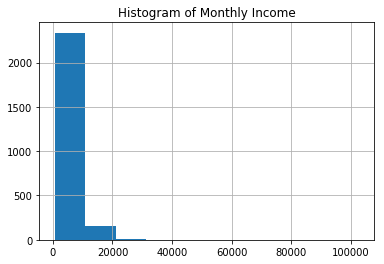

In [10]:
hist_inc = loansData['Monthly.Income'].hist()
plt.title('Histogram of Monthly Income')
plt.show()

This is not very informative. To allow for a little more differentiation, let's create a new column in the dataframe called 'Monthly.LogIncome' and print a histogram of it.

In [11]:
loansData['Monthly.LogIncome'] = numpy.log(loansData['Monthly.Income']) 

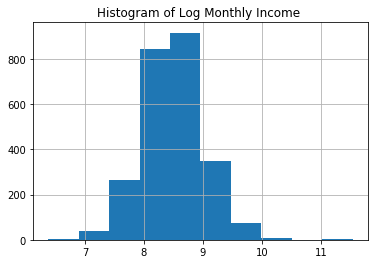

In [12]:
h = loansData['Monthly.LogIncome'].hist()
plt.title('Histogram of Log Monthly Income ')
plt.show()

### Exercise 4 (6 points)

Finally, we answer some questions about the data. What is the cardinality (i.e., # of distinct values) for 'Interest.Rate' and 'FICO.Range'?

In [165]:
print('Cardinality for Interest.Rate = {}'.format(loansData['Interest.Rate'].describe()['unique']))
print('Cardinality for FICO.Range = {}'.format(loansData['FICO.Range'].describe()['unique']))

Cardinality for Interest.Rate = 275
Cardinality for FICO.Range = 38


Can we get a sense of the relationship between monthly income and interest rate? Use the scatter() function from Matplotlib.

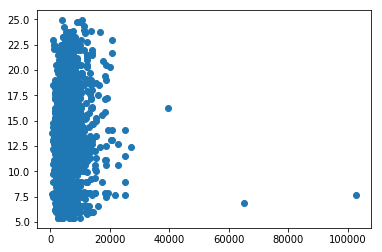

In [188]:
loansData['Interest.Rate.Value'] = loansData['Interest.Rate'].str.strip('%').astype(float)
plt.scatter(loansData['Monthly.Income'], loansData['Interest.Rate.Value'])
plt.show()

What is the average interest rate for each FICO range? 
Hint: use the groupby() method in Pandas.

In [189]:
fico_grp = loansData[['Interest.Rate.Value', 'FICO.Range']].groupby(['FICO.Range']).mean()

In [190]:
fico_grp

,Interest.Rate.Value
FICO.Range,
640-644,15.212000
645-649,14.883333
650-654,15.130000
655-659,14.930000
660-664,18.492480
665-669,17.448069
670-674,16.248480
675-679,15.854699
680-684,15.126688
